# Multinomial Logistic Regression from Scratch

1.  Predict - `X.shape = (m, n); y.shape = (m, k); theta/w/weights.shape = (n, k)`
    
    What is $g(x)$ input and output?

    input  = X:    (m, n)
    output = yhat: (m, k) 

    Mathematially, $g(x)$ is an adapted version of the sigmoid formula, so that it outputs (m, k).  We called this $g(x)$ the **softmax** function.

    $$ h = P(y = c | \theta) = \frac{e^{\mathbf{X}\theta_c}}{\sum_{i=1}^k e^{\mathbf{X}\theta_i}}$$

    Division makes sure the probability sums to 1.

    Why $e$?
    - $e$ always give positive number, so it's a perfect guy to calculate probability!
    - But hey, chaky, $e$ to the power of something gives me some number, like very high number, like 8103...., so how it can be probability? 
      - Ans: very simple, just divide by all e, then they will be frac of 1
    - Derivative of e cancels nicely with log
    
    Why is called softmax?
    - what is hardmax ==> [2, 3, 4] ==> [0, 0, 1] 
      - The y vector has only probability of either 1 or 0
    - softmax: ==> [2, 3, 4] ==> [0.05, 0.15, 0.8]

2. Find the gradient
  2.1 

    

In [2]:
import numpy as np

X = np.array([[1,3,8],[4,8,1]])
X.shape

(2, 3)

In [3]:
y = np.array([[0, 1,0], [0, 0, 1]])
y.shape #(2, 3) -- > (m, k) where k is the number of  classes

(2, 3)

In [9]:
yhat_example = np.array([[0.05, 0.86, 0.09], [0.3, 0.3, 0.4]])
yhat_example.shape



(2, 3)

In [10]:
np.argmax(yhat_example, axis=1)

array([1, 2])

In [ ]:
'''
'''

w = np.ones(X.shape[1], len(y.unique()))
# Asuming y is not yet one-hot encoded

In [11]:
X

array([[1, 3, 8],
       [4, 8, 1]])

In [17]:
theta = np.arange(9).reshape((X.shape[1], 3))
theta

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [22]:
something = X @ theta
np.exp(something)
yhat = np.exp(something) / np.sum(np.exp(something), axis=1, keepdims=True)
yhat.sum(axis=1)

array([1., 1.])

$$ h = P(y = c | \theta) = \frac{e^{\mathbf{X}\theta_c}}{\sum_{i=1}^k e^{\mathbf{X}\theta_i}}$$

In [24]:
#so please write the softmax function,
#can calculate the yhat with the given theta
def softmax(input):
    return np.exp(input) / np.sum(np.exp(input), axis=1, keepdims=True)

yhat = softmax(X @ theta)
sum = yhat.sum(axis=1)

assert np.all(sum == 1)

assert yhat.shape == (X.shape[0], 3) # y ->(m,k)


In [33]:
# 1. Implement this loss function - cross entrophy
def ce(Y, H):
    return -np.sum(Y * np.log(H)) # J is a number, no need to keepdim

#2. Create a y, a good yhat, a bad y hat
Y = np.array([[0, 0, 1, 0]]) #(1,k)
good_Y = np.array([[0.04 ,0.03, 0.9, 0.03]])
bad_Y = np.array([[0.3, 0.3, 0.1, 0.3]])

#3. And check the loss. A good yhat should have low loss, and bad yhat should have high loss
print("Good", ce(Y, good_Y))
print("Bad", ce(Y, bad_Y))

#4. Optional 

Good 0.10536051565782628
Bad 2.3025850929940455


Text(0, 0.5, 'loss')

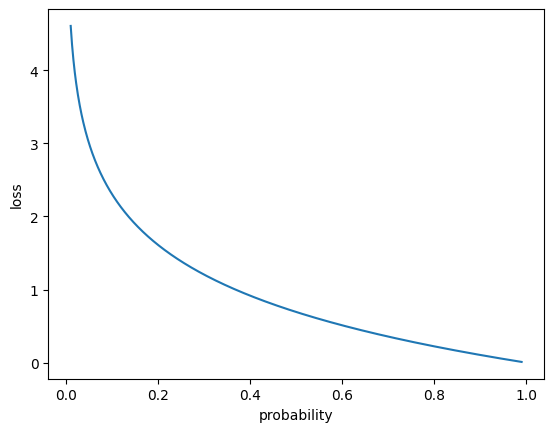

In [31]:
import matplotlib.pyplot as plt
x = np.linspace(0.01, 0.99, 1000)
plt.plot(x, -np.log(x))
plt.xlabel("probability")
plt.ylabel("loss")

In [26]:
np.log(0.9)

-0.10536051565782628

## Let's code Multinomial logistic regression

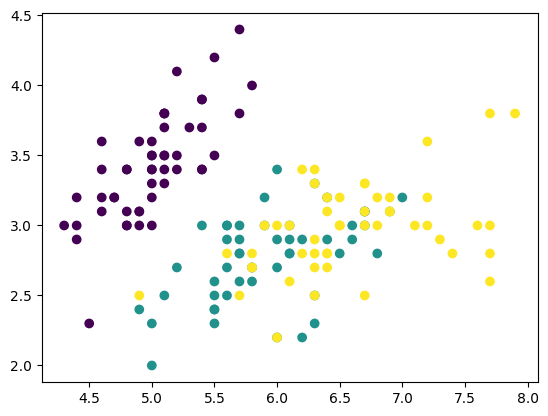

In [35]:
#1. Load sklern iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X,y = load_iris(return_X_y=True)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()



In [36]:
#2. perform split, standadization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

In [41]:
#hint - check how your y 
#convert y_train to one-hot encoded y_train
#1 - make the np.zero one-hot encode y_train
# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(X)
m = X_train.shape[0]
k = len(set(y_train))
oh_y_train = np.zeros((m,k))

for i in range(k):
    cond = y_train == i
    oh_y_train[cond, i] = 1


In [65]:
#3. Implement the class MultinormialLogisticRegression with fit and predicr
class MultinormialLogisticRegression(object):
    def __init__(self, num_epochs = 5, alpha = 0.01):
        self.num_epochs = num_epochs
        self.alpha = alpha
        self.theta = None

    def cross_entrophy(self, y, yhat): # H = yhat = f(x)
        return -np.sum(y * np.log(yhat))

    def fit(self, X_train, oh_y_train):
        m,n = X_train.shape
        K = oh_y_train.shape[1]
        self.theta = np.ones((n,k))
        losses = []

        for i in range(self.num_epochs):
            #randomize our X_train
            perm = np.random.permutation(X_train.shape[0])
            X_train = X_train[perm]
            oh_y_train = oh_y_train[perm]     

            #1. Predict
            yhat = self._predict(X_train)

            #1.1 Optional Kepp the loss
            loss = self.cross_entrophy(oh_y_train, yhat)
            losses.append(loss)

            #2. Gradient
            grad = X_train.T @ (yhat - oh_y_train)
            print(grad)

            #3. Update
            self.theta = self.theta - self.alpha * grad

        return losses

    def _predict(self, X_train):
        input = X_train @ self.theta
        return np.exp(input) / np.sum(np.exp(input), axis=1, keepdims=True)

    def predict(self, X_test):
        input = self._predict(X_test)
        return np.argmax(input, axis=1)
        

In [74]:
#4. Test with test set and print sklearn.matics calssification report, as well as confusion matrix
    #use argmax, becasuse your test set is NOT one-hot encoded...

lr = MultinormialLogisticRegression()
train_losses = lr.fit(X_train, oh_y_train)

[[ 2.16493490e-15 -3.00000000e+00  3.00000000e+00]
 [ 3.56424154e+01 -6.29404526e+00 -2.93483701e+01]
 [-2.99274016e+01  2.44064861e+01  5.52091548e+00]
 [ 4.57348346e+01 -1.24276769e+01 -3.33071577e+01]
 [ 4.38099980e+01 -7.41409703e+00 -3.63959010e+01]]
[[  5.05079484  -9.40340098   4.35260614]
 [  5.86771105   0.09740925  -5.9651203 ]
 [ -9.38597896  12.5607353   -3.17475634]
 [ 10.03306091  -2.01571657  -8.01734435]
 [  9.29127234   2.13314081 -11.42441314]]
[[ 4.25540555 -8.36549715  4.1100916 ]
 [ 3.94083385 -0.43025654 -3.51057731]
 [-6.79027797  8.92772085 -2.13744288]
 [ 7.12403718 -1.27872267 -5.84531451]
 [ 6.54989547  2.4829892  -9.03288467]]
[[ 3.53773847 -7.20829737  3.6705589 ]
 [ 3.1228945  -0.78277719 -2.34011731]
 [-5.33417589  6.49563828 -1.16146239]
 [ 5.72707574 -0.81319406 -4.91388168]
 [ 5.25371248  2.6527085  -7.90642098]]
[[ 2.97571402 -6.31676661  3.34105259]
 [ 2.66793622 -1.05649879 -1.61143743]
 [-4.39477557  4.82722342 -0.43244786]
 [ 4.88697343 -0.5411808

Text(0, 0.5, 'losses')

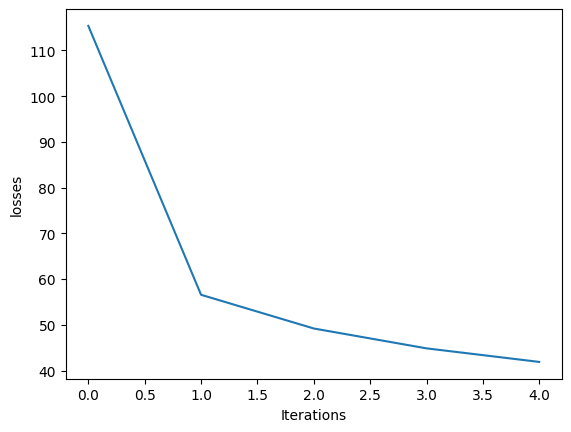

In [76]:
plt.plot(train_losses)
plt.xlabel("Iterations")
plt.ylabel("losses")

In [70]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
yhat = lr.predict(X_test)

accuracy_score(y_test, yhat)

0.9111111111111111

In [71]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      0.92      0.85        12
           2       0.94      0.83      0.88        18

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



In [72]:
print(confusion_matrix(y_test, yhat))

[[15  0  0]
 [ 0 11  1]
 [ 0  3 15]]


<AxesSubplot: >

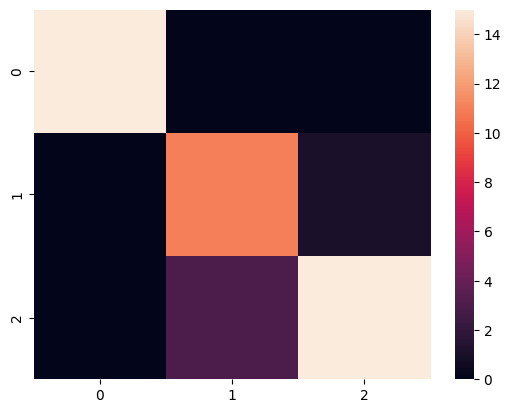

In [77]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, yhat))

In [78]:
#5. Compare the results with sklearn.linear_model.LogisticRegression()

from sklearn.linear_model import LogisticRegression

#clf = LogisticRegression(random_state=0).fit(X, y)